!pip install pycaret==3.0.4  # 書籍執筆時点のバージョンをインストール


# 最新版をインストール場合はこちら
# !pip install pycaret

In [1]:
import pycaret

pycaret.__version__

'3.3.2'

# 使用するデータ


In [2]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


# データの準備

##エンコーディング

In [3]:
employee['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [4]:
employee['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [5]:
employee['time_spend_company'].value_counts()

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

### one-hotエンコーディング


In [6]:
from pycaret.classification import *


clf1 = setup(data=employee, target='left')

,Description,Value
0,Session id,7240
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [7]:
clf1.X_transformed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_sales,department_support,department_product_mng,department_marketing,department_IT,department_hr,department_RandD,department_technical,department_accounting,department_management,salary_medium,salary_low,salary_high
9786,0.81,0.87,4.0,203.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9467,0.66,0.56,5.0,202.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3838,0.26,0.47,6.0,182.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13751,0.44,0.41,3.0,125.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3199,0.18,0.52,5.0,185.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,0.13,0.97,4.0,162.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2400,0.97,0.40,4.0,258.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8021,0.65,0.95,4.0,153.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3072,0.15,0.85,3.0,199.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_sales,department_support,department_product_mng,department_marketing,department_IT,department_hr,department_RandD,department_technical,department_accounting,department_management,salary_medium,salary_low,salary_high
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Ordinal（序数）エンコーディング

In [9]:
# init setup
from pycaret.classification import *


clf2 = setup(data=employee, target='left',
             ordinal_features={'salary' : ['low', 'medium', 'high']},
             categorical_features=['department'])

,Description,Value
0,Session id,758
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 19)"
5,Transformed train set shape,"(10499, 19)"
6,Transformed test set shape,"(4500, 19)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,1


In [10]:
clf2.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_product_mng,department_sales,department_IT,department_technical,department_marketing,department_accounting,department_management,department_support,department_RandD,department_hr,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### カテゴリ数が多い場合のエンコーディング

In [11]:
from pycaret.classification import *

# init setup with custom encoding settings
clf3 = setup(data=employee, target='left', max_encoding_ohe=3)
clf3.X_transformed.sort_index()

,Description,Value
0,Session id,3108
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 12)"
5,Transformed train set shape,"(10499, 12)"
6,Transformed test set shape,"(4500, 12)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary_low,salary_medium,salary_high
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.245152,1.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.245152,0.0,1.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.245152,0.0,1.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.245152,1.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.245152,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.233184,1.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.233184,1.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.233184,1.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.233184,1.0,0.0,0.0


In [12]:
clf3.pipeline

Pipeline(memory=FastMemory(location=C:\Users\SHUHO~1.HID\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['satisfaction_level',
                                             'last_evaluation',
                                             'number_project',
                                             'average_montly_hours',
                                             'time_spend_company',
                                             'Work_accident',
                                             'promotion_last_5years'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,...
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('rest_encoding',
                 TransformerWrapper(exclude=None, include=['department'],
                                    transformer=TargetEncoder(cols=['department'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0)))],
         verbose=False)

##データ型の指定

In [13]:
from pycaret.datasets import get_data
from pycaret.classification import *


employee = get_data('employee')

clf1 = setup(data=employee, target='left', categorical_features=['time_spend_company'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,5678
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 17)"
5,Transformed train set shape,"(10499, 17)"
6,Transformed test set shape,"(4500, 17)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [14]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_4.0,time_spend_company_3.0,time_spend_company_2.0,time_spend_company_5.0,time_spend_company_6.0,time_spend_company_7.0,time_spend_company_10.0,time_spend_company_8.0,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14995,0.37,0.48,2.0,160.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14996,0.37,0.53,2.0,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14997,0.11,0.96,6.0,280.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low


In [15]:
clf2 = setup(data=employee, target ='left', ignore_features=['department', 'salary'])
clf2.X_transformed.sort_index()

,Description,Value
0,Session id,7384
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 8)"
5,Transformed train set shape,"(10499, 8)"
6,Transformed test set shape,"(4500, 8)"
7,Ignore features,2
8,Numeric features,7
9,Preprocess,True


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0


In [16]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_4.0,time_spend_company_3.0,time_spend_company_2.0,time_spend_company_5.0,time_spend_company_6.0,time_spend_company_7.0,time_spend_company_10.0,time_spend_company_8.0,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14995,0.37,0.48,2.0,160.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14996,0.37,0.53,2.0,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14997,0.11,0.96,6.0,280.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low


## 欠損値置換

In [17]:
import numpy as np
from pycaret.datasets import get_data


employee = get_data('employee')

employee['satisfaction_level'][1] = np.nan  # 欠損値の代入
employee['satisfaction_level'][3] = np.nan  # 欠損値の代入

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [18]:
employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,NaN,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,NaN,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [19]:
# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left')

,Description,Value
0,Session id,7401
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Rows with missing values,0.0%


In [20]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_hr,department_support,department_management,department_accounting,department_sales,department_technical,department_product_mng,department_marketing,department_RandD,salary_medium,salary_low,salary_high
0,0.380000,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.611657,0.86,5.0,262.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.110000,0.88,7.0,272.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.611657,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.370000,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.400000,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.370000,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.370000,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.110000,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
clf2 = setup(data=employee, target='left', numeric_imputation='median')
clf2.X_transformed.sort_index()

,Description,Value
0,Session id,2358
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Rows with missing values,0.0%


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_product_mng,department_management,department_IT,department_technical,department_sales,department_RandD,department_hr,department_marketing,department_support,department_accounting,salary_low,salary_medium,salary_high
0,0.380,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.645,0.86,5.0,262.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.110,0.88,7.0,272.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.645,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.370,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.400,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14995,0.370,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14996,0.370,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14997,0.110,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [22]:
clf2.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_product_mng,department_management,department_IT,department_technical,department_sales,department_RandD,department_hr,department_marketing,department_support,department_accounting,salary_low,salary_medium,salary_high
0,0.380,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.645,0.86,5.0,262.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.110,0.88,7.0,272.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.645,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.370,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.400,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14995,0.370,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14996,0.370,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14997,0.110,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## 不均衡データ

In [23]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', fix_imbalance=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,7245
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(20498, 21)"
5,Transformed train set shape,"(15998, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [24]:
employee['left'].value_counts()


left
0    11428
1     3571
Name: count, dtype: int64

In [25]:
clf1.y_transformed.value_counts()


left
0    11428
1     9070
Name: count, dtype: int64

# スケーリング

In [26]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee,
             target='left', normalize=True, normalize_method='zscore')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,8836
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [27]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_technical,department_sales,department_IT,department_accounting,department_marketing,department_hr,department_support,department_product_mng,department_management,salary_low,salary_medium,salary_high
0,-0.938063,-1.080359,-1.461244,-0.877604,-0.342199,-0.413654,-0.148322,-0.241151,-0.471418,1.628443,-0.295662,-0.231718,-0.247282,-0.228275,-0.414443,-0.253085,-0.214788,1.020692,-0.864078,-0.300398
1,0.754469,0.848838,0.974575,1.223958,1.712363,-0.413654,-0.148322,-0.241151,-0.471418,1.628443,-0.295662,-0.231718,-0.247282,-0.228275,-0.414443,-0.253085,-0.214788,-0.979727,1.157303,-0.300398
2,-2.026120,0.965759,2.598455,1.424106,0.342655,-0.413654,-0.148322,-0.241151,-0.471418,1.628443,-0.295662,-0.231718,-0.247282,-0.228275,-0.414443,-0.253085,-0.214788,-0.979727,1.157303,-0.300398
3,0.432082,0.907299,0.974575,0.443377,1.027509,-0.413654,-0.148322,-0.241151,-0.471418,1.628443,-0.295662,-0.231718,-0.247282,-0.228275,-0.414443,-0.253085,-0.214788,1.020692,-0.864078,-0.300398
4,-0.978362,-1.138819,-1.461244,-0.837575,-0.342199,-0.413654,-0.148322,-0.241151,-0.471418,1.628443,-0.295662,-0.231718,-0.247282,-0.228275,-0.414443,-0.253085,-0.214788,1.020692,-0.864078,-0.300398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.857467,-0.846516,-1.461244,-0.997694,-0.342199,-0.413654,-0.148322,-0.241151,-0.471418,-0.614084,-0.295662,-0.231718,-0.247282,-0.228275,2.412874,-0.253085,-0.214788,1.020692,-0.864078,-0.300398
14995,-0.978362,-1.372661,-1.461244,-0.817560,-0.342199,-0.413654,-0.148322,-0.241151,-0.471418,-0.614084,-0.295662,-0.231718,-0.247282,-0.228275,2.412874,-0.253085,-0.214788,1.020692,-0.864078,-0.300398
14996,-0.978362,-1.080359,-1.461244,-1.157813,-0.342199,-0.413654,-0.148322,-0.241151,-0.471418,-0.614084,-0.295662,-0.231718,-0.247282,-0.228275,2.412874,-0.253085,-0.214788,1.020692,-0.864078,-0.300398
14997,-2.026120,1.433443,1.786515,1.584225,0.342655,-0.413654,-0.148322,-0.241151,-0.471418,-0.614084,-0.295662,-0.231718,-0.247282,-0.228275,2.412874,-0.253085,-0.214788,1.020692,-0.864078,-0.300398


<Axes: >

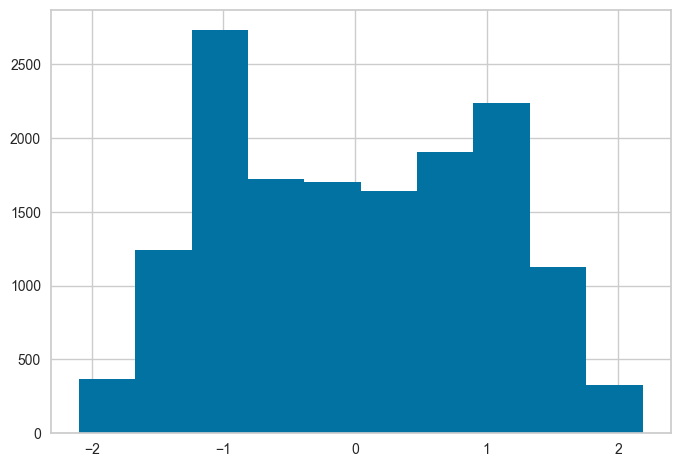

In [28]:
clf1.X_transformed['average_montly_hours'].hist()

## ターゲット変数変換

In [29]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.regression import *


reg1 = setup(data=employee, target='average_montly_hours', transform_target=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,1831
1,Target,average_montly_hours
2,Target type,Regression
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [30]:
reg1.y_transformed.sort_index()

0        41.758036
1        59.146448
2        60.665801
3        53.023594
4        42.120359
           ...    
14994    40.661666
14995    42.300948
14996    39.176852
14997    61.867814
14998    41.939389
Name: average_montly_hours, Length: 14999, dtype: float64

<Axes: >

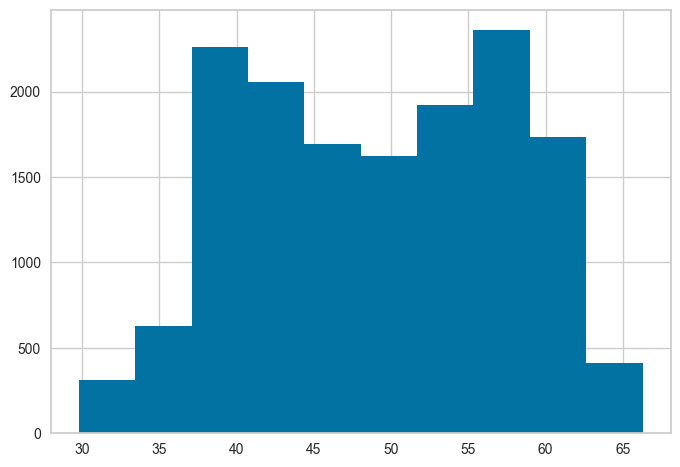

In [31]:
reg1.y_transformed.hist()

# 特徴量エンジニアリング

## 多項式特徴量

In [32]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', polynomial_features=True, polynomial_degree=2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,3240
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 231)"
5,Transformed train set shape,"(10499, 231)"
6,Transformed test set shape,"(4500, 231)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [33]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_marketing,department_sales,...,department_hr^2,department_hr salary_medium,department_hr salary_low,department_hr salary_high,salary_medium^2,salary_medium salary_low,salary_medium salary_high,salary_low^2,salary_low salary_high,salary_high^2
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Group特徴量

In [34]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', group_features=['satisfaction_level', 'last_evaluation'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


AttributeError: 'list' object has no attribute 'items'

In [ ]:
clf1.X_transformed.sort_index()

## binning

In [35]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', bin_numeric_features=['average_montly_hours'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,741
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [36]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_sales,department_technical,department_support,department_product_mng,department_IT,department_accounting,department_hr,department_RandD,department_management,department_marketing,salary_low,salary_medium,salary_high
0,0.38,0.53,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5.0,4.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.11,0.88,7.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.72,0.87,5.0,3.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14995,0.37,0.48,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14996,0.37,0.53,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14997,0.11,0.96,6.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
employee['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

<Axes: >

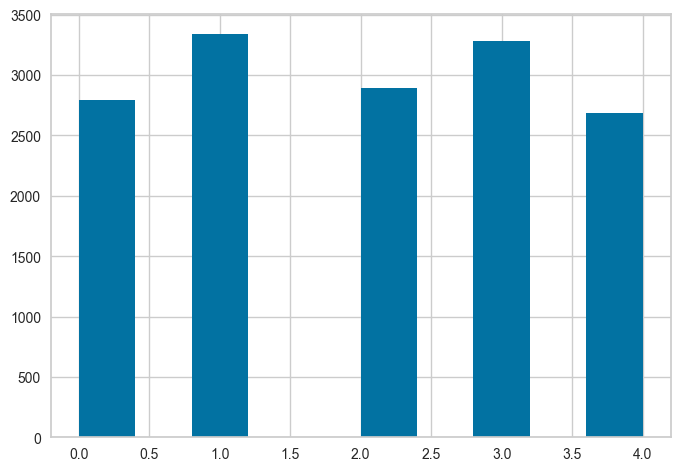

In [38]:
clf1.X_transformed['average_montly_hours'].hist()

## combine rare level

In [ ]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', rare_to_value=0.1, rare_value='other')

In [ ]:
clf1.X_transformed.sort_index()

In [ ]:
employee['department'].value_counts()

# 特徴量選択

## 特徴量選択

In [ ]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.regression import *


clf1 = setup(data=employee, target='left')

In [ ]:
clf1.X_transformed.sort_index()

In [ ]:
clf2 = setup(data=employee, target='left', feature_selection=True, n_features_to_select=0.9)

clf2.X_transformed.sort_index()

## 多重共線性

In [ ]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.regression import *


clf1 = setup(data=employee, target='left',
             remove_multicollinearity=True, multicollinearity_threshold=0.4)

In [ ]:
clf1.X_transformed.sort_index()

## 主成分分析

In [ ]:
# load dataset
from pycaret.datasets import get_data


income = get_data('income')

# init setup
from pycaret.classification import *


clf1 = setup(data=income, target='income >50K', pca=True, pca_components=10)

## 分散の低い特徴量の削除

In [ ]:
# load dataset
from pycaret.datasets import get_data


mice = get_data('mice')
# filter dataset
mice = mice[mice['Genotype'] == 'Control']

# init setup
from pycaret.classification import *


clf1 = setup(data=mice, target='class', low_variance_threshold=0.1)